In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

d:\data-science\DA\oil_data_exploration


In [3]:
load_dotenv();

In [4]:
base_ngl_data_name = 'ngl_'
base_vol_data_name = 'vol_'
months = 10

drilling_events = pd.read_excel(os.getenv('DRILLING_EVENT'), skiprows=2)
for month in range(1, months):
    if month == 9:
        df_name = f'{base_vol_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('VOL_DATA').replace('XX', f'0{month}'), low_memory=False)
    else: 
        df_name = f'{base_ngl_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('NGL_DATA').replace('XX', f'0{month}'), low_memory=False)
        df_name = f'{base_vol_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('VOL_DATA').replace('XX', f'0{month}'), low_memory=False)

In [5]:
merged_ngl_df = pd.concat([ngl_6, ngl_7, ngl_8], ignore_index=True)

In [6]:
merged_vol_df = pd.concat([vol_6, vol_7, vol_8], ignore_index=True)

In [7]:
production_data = pd.read_csv(os.getenv('PRODUCTION'), low_memory=False)
minable_oil_sands_well_data = pd.read_csv(os.getenv('MINABLE_WELL_DATA'), low_memory=False)
well_infrastructure = pd.read_csv(os.getenv('WELL_INFRASTRUCTURE'), low_memory=False)

In [8]:
drilling_events.shape

(849, 7)

In [9]:
drilling_events.isnull().sum()

Well Licence Number    0
UWI with /9            0
Total Depth            0
Spud Date              0
Rig Release Date       0
Date Updated Date      0
Total # of ES          0
dtype: int64

In [10]:
merged_ngl_df.shape

(321121, 26)

In [11]:
merged_ngl_df.isnull().sum()

ReportingFacilityID        5163
ReportingFacilityName      5163
OperatorBAID               5163
OperatorName               5163
ProductionMonth               0
WellID                        0
WellLicenseNumber          5091
Field                      5091
Pool                      34055
Area                     307377
Hours                         0
GasProduction                 0
OilProduction                 0
CondensateProduction          0
WaterProduction               0
ResidueGasVolume              0
Energy                        0
EthaneMixVolume               0
EthaneSpecVolume              0
PropaneMixVolume              0
PropaneSpecVolume             0
ButaneMixVolume               0
ButaneSpecVolume              0
PentaneMixVolume              0
PentaneSpecVolume             0
LiteMixVolume                 0
dtype: int64

In [12]:
threshold = 0.7 * len(merged_ngl_df)
merged_ngl_df = merged_ngl_df.dropna(axis=1, thresh=threshold)

In [13]:
merged_vol_df.shape

(1617716, 30)

In [14]:
merged_vol_df.isnull().sum()

ProductionMonth                         0
OperatorBAID                            0
OperatorName                            0
ReportingFacilityID                     0
ReportingFacilityProvinceState          0
ReportingFacilityType                   0
ReportingFacilityIdentifier             0
ReportingFacilityName                   0
ReportingFacilitySubType                0
ReportingFacilitySubTypeDesc            0
ReportingFacilityLocation               0
FacilityLegalSubdivision                0
FacilitySection                         0
FacilityTownship                        0
FacilityRange                           0
FacilityMeridian                        0
SubmissionDate                         44
ActivityID                          23970
ProductID                           74653
FromToID                           276936
FromToIDProvinceState              325331
FromToIDType                       325331
FromToIDIdentifier                 280889
Volume                            

In [15]:
threshold = 0.7 * len(merged_vol_df)
merged_vol_df = merged_vol_df.dropna(axis=1, thresh=threshold)

In [16]:
production_data.shape

(680, 5)

In [17]:
production_data.isnull().sum()

Date             0
Oil Monthly      0
Gas Monthly      0
Water Monthly    0
Wells Monthly    0
dtype: int64

In [18]:
minable_oil_sands_well_data.shape

(236, 14)

In [19]:
minable_oil_sands_well_data.isnull().sum()

BHID         0
CPA-ID      40
X83          0
Y83          0
Z            0
FROM         0
TO           0
LENGTH       0
CORGR        0
CALEGR       0
GRADE        0
SHALE        0
POROSITY     0
WATER        0
dtype: int64

In [20]:
well_infrastructure.shape

(658134, 72)

In [26]:
well_infrastructure.isnull().sum()

WellID                                        0
WellProvinceState                             0
WellType                                      0
WellIdentifier                                0
WellLocationException                         0
WellLegalSubdivision                          0
WellSection                                   0
WellTownship                                  0
WellRange                                     0
WellMeridian                                  0
WellEventSequence                             0
WellName                                      1
ConfidentialType                              0
ExperimentalConfidentialIndicator             0
LicenceType                                   0
LicenceNumber                                 0
LinkedFacilityProvinceState                   0
LinkedFacilityType                            0
LinkedFacilitySubType                         0
Field                                         0
FieldName                               

In [31]:
len(well_infrastructure['LicenseeName'].unique())

3253

In [22]:
threshold = 0.7 * len(well_infrastructure)
well_infrastructure = well_infrastructure.dropna(axis=1, thresh=threshold)

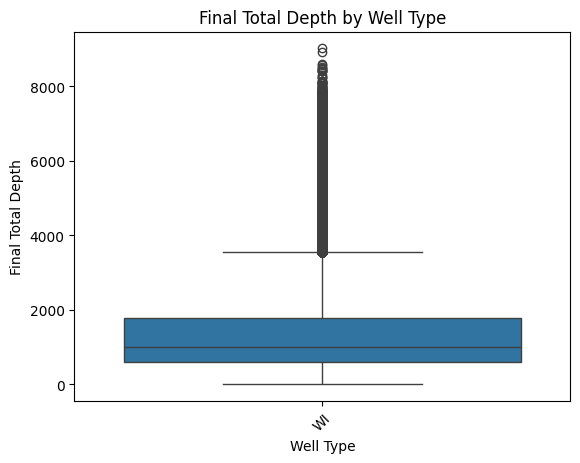

In [23]:
sns.boxplot(data=well_infrastructure, x='WellType', y='FinalTotalDepth', legend=False)
plt.title("Final Total Depth by Well Type")
plt.xlabel("Well Type")
plt.ylabel("Final Total Depth")
plt.xticks(rotation=45)
plt.show()

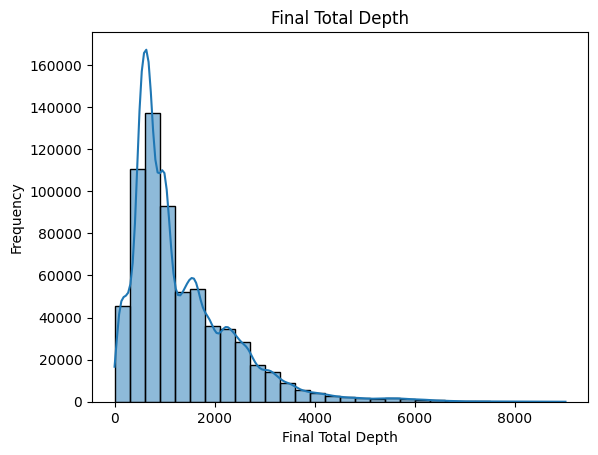

In [24]:
sns.histplot(well_infrastructure['FinalTotalDepth'], bins=30, kde=True)
plt.title("Final Total Depth")
plt.xlabel("Final Total Depth")
plt.ylabel("Frequency")
plt.show()

In [48]:
print(well_infrastructure['LicenceStatus'].unique())

status_mapping = {
    'RecExempt': 'RECEXEMPT',
    'Suspension': 'SUSPENSION',
    'Issued': 'ISSUED',
    'Abandoned': 'ABANDONED',
    'Re-Entered': 'RE-ENTERED',
    'Amended': 'AMENDED',
    'RecCertified': 'RECCERTIFIED'
}

well_infrastructure['LicenceStatus'] = well_infrastructure['LicenceStatus'].replace(status_mapping)

['RecExempt' 'SUSPENSION' 'ABANDONED' 'RECCERTIFIED' 'RecCertified'
 'ISSUED' 'AMENDED' 'Abandoned' 'RECEXEMPT' 'Issued' 'Suspension'
 'Amended' 'Re-Entered' 'RE-ENTERED']


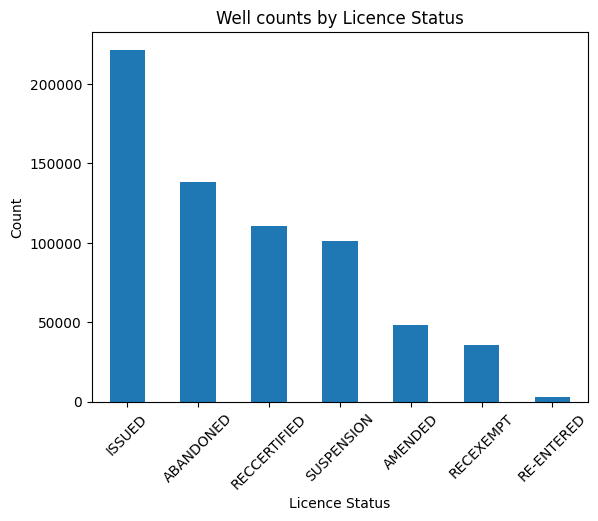

In [49]:
licence_status_counts = well_infrastructure['LicenceStatus'].value_counts()
licence_status_counts.plot(kind='bar')
plt.title("Well counts by Licence Status")
plt.xlabel("Licence Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [54]:
active_licenses = well_infrastructure[well_infrastructure['LicenceStatus'] == 'ISSUED']

top_companies = active_licenses['LicenseeName'].value_counts().head(5)

print("Top 5 Licensees with the Most Active Licenses:")
print(top_companies)

Top 5 Licensees with the Most Active Licenses:
LicenseeName
CANADIAN NATURAL RESOURCES LIMITED    42776
TORXEN ENERGY LTD.                    19853
EMBER RESOURCES INC.                  14091
IPC CANADA LTD.                       13624
LYNX ENERGY ULC                       10081
Name: count, dtype: int64


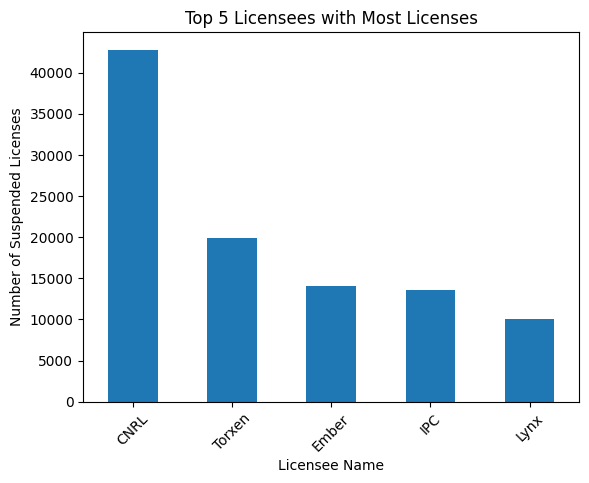

In [59]:
custom_labels = ["CNRL", "Torxen", "Ember", "IPC", "Lynx"]

top_companies.plot(kind='bar')
plt.title("Top 5 Licensees with Most Licenses")
plt.xlabel("Licensee Name")
plt.ylabel("Number of Suspended Licenses")
plt.xticks(rotation=45, ticks=range(len(custom_labels)), labels=custom_labels)
plt.show()

In [60]:
suspended_licenses = well_infrastructure[well_infrastructure['LicenceStatus'] == 'SUSPENSION']

top_licensees = suspended_licenses['LicenseeName'].value_counts().head(5)

print("Top 5 Licensees with the Most Suspended Licenses:")
print(top_licensees)

Top 5 Licensees with the Most Suspended Licenses:
LicenseeName
CANADIAN NATURAL RESOURCES LIMITED    30177
CENOVUS ENERGY INC.                    6722
SEQUOIA RESOURCES CORP.                3664
IMPERIAL OIL RESOURCES LIMITED         2616
TORXEN ENERGY LTD.                     2593
Name: count, dtype: int64


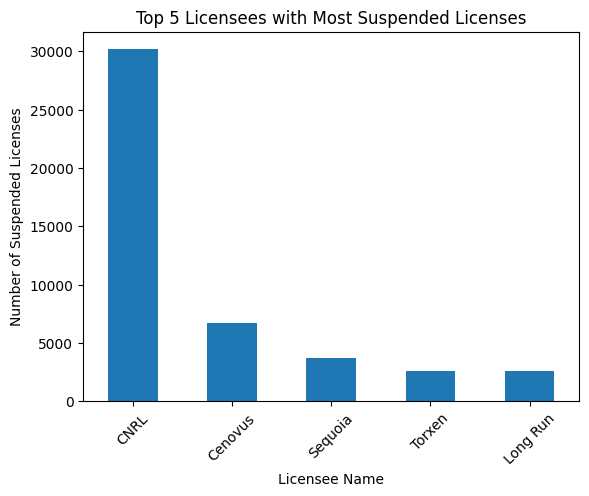

In [61]:
custom_labels = ["CNRL", "Cenovus", "Sequoia", "Torxen", "Long Run"]

top_licensees.plot(kind='bar')
plt.title("Top 5 Licensees with Most Suspended Licenses")
plt.xlabel("Licensee Name")
plt.ylabel("Number of Suspended Licenses")
plt.xticks(rotation=45, ticks=range(len(custom_labels)), labels=custom_labels)
plt.show()